# Agenda of this Case Study
Derive insights from the data, in doing so we will
- learn to use python to fetch, manipulate, see and understand data
- get familiar with some common python libraries and functions we use for EDA

# Context of the dataset we are going to use
Each year, we at Stack Overflow ask the developer community about everything from their favorite technologies to their job preferences. This year marks the eighth year we’ve published our Annual Developer Survey results—with the largest number of respondents yet. Over 100,000 developers took the 30-minute survey in January 2018.

This year, we covered a few new topics ranging from artificial intelligence to ethics in coding. We also found that underrepresented groups in tech responded to our survey at even lower rates than we would expect from their participation in the workforce. Want to dive into the results yourself and see what you can learn about salaries or machine learning or diversity in tech? We look forward to seeing what you find!

# Content
This 2018 Developer Survey results are organized on Kaggle in two tables:

survey_results_public contains the main survey results, one respondent per row and one column per question

survey_results_schema contains each column name from the main results along with the question text corresponding to that column

There are 98,855 responses in this public data release. These responses are what we consider “qualified” for analytical purposes based on completion and time spent on the survey and included at least one non-PII question. Approximately 20,000 responses were started but not included here because respondents did not answer enough questions, or only answered questions with personally identifying information. Of the qualified responses, 67,441 completed the entire survey.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('survey_results_public.csv')
questions = pd.read_csv('survey_results_schema.csv')

E:\Machine learning\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(df.shape)
df.head() 

(98855, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


- we got an error above, stating that there is a mix of data types in certain columns
- From the data above we can see that the column 'Company Size' has numbers and strings 
- Similarly it is the case for certain other columns
- The warning message says either specify the dtype of each and every column or set low_memory = False. The latter is more feasible for this dataset having 129 columns

In [6]:
df = pd.read_csv('survey_results_public.csv', low_memory = False)  # We do not get the same warning

- Most warnings are often harmless but it is necessary to be cognizant of the same
- The way to deal with these warnings is often documented in the library that we use


_Now let's check out a few questions from the survey schema data_

In [7]:
questions.head() 

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


- We can see how the table is structured
- Each column in df is essentially a question and the column name is an alias for that question
- We can see any question in its entirety by featching it from the questions dataframe

In [8]:
questions.loc[4,'QuestionText']  

'Are you currently enrolled in a formal, degree-granting college or university program?'

- We used .loc[ ] to fetch a specific value from the dataframe
- But what if we did not know the position of a certain column name whose question we want to fetch?

In [9]:
questions.set_index('Column', inplace=True)
questions.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
Hobby,Do you code as a hobby?
OpenSource,Do you contribute to open source projects?
Country,In which country do you currently reside?
Student,"Are you currently enrolled in a formal, degree..."


- Now that the index has actual names, we can use .loc[ ] to index based on the column values

In [10]:
questions.loc['Student', 'QuestionText']

'Are you currently enrolled in a formal, degree-granting college or university program?'

- Feel free to explore what other column names in 'df' mean by fetching their respective questions from the 'questions' dataframe


_One of the first few things we do to understand the data is look at its info()_

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


- Of the 129 columns, 41 are float type, 1 is integer type and the rest 87 are object type data
- We have 98855 rows in total
- And the amount of memory this dataset is occupying on the RAM is 97.3MB

_Here after, we will proceed with exploring and understanding the data without any obvious comments like we did earlier_

In [12]:
df.isna().apply(pd.value_counts)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
False,98855.0,98855.0,98855.0,98443,94901,95321,94703,79036,71531,92098,...,72108,64469,59765,61813,57473,64574,62596,15781,65941,65879
True,NaN,NaN,NaN,412,3954,3534,4152,19819,27324,6757,...,26747,34386,39090,37042,41382,34281,36259,83074,32914,32976


- Number of missing values in each of the columns
- Treating missing values is beyond the scope of this notebook, hence we will ignore it for now

In [13]:
np.array(df.columns)

array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

In [14]:
df.Country.value_counts().head()

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
Name: Country, dtype: int64

- For convinence, we have only displayed the top five countries
- To get a broader picture, we can create a barplot

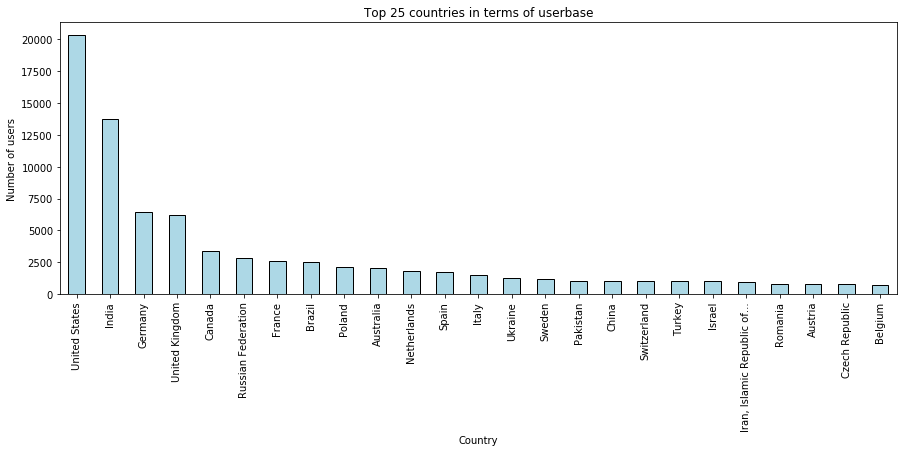

In [15]:
df.Country.value_counts().head(25).plot(kind = 'bar', edgecolor = 'black', color = 'lightblue', figsize = (15,5))
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.title('Top 25 countries in terms of userbase')
plt.show()

- The above are top 25 countries in terms of userbase
- In the above plot, we can add another detail and make a stacked barchart

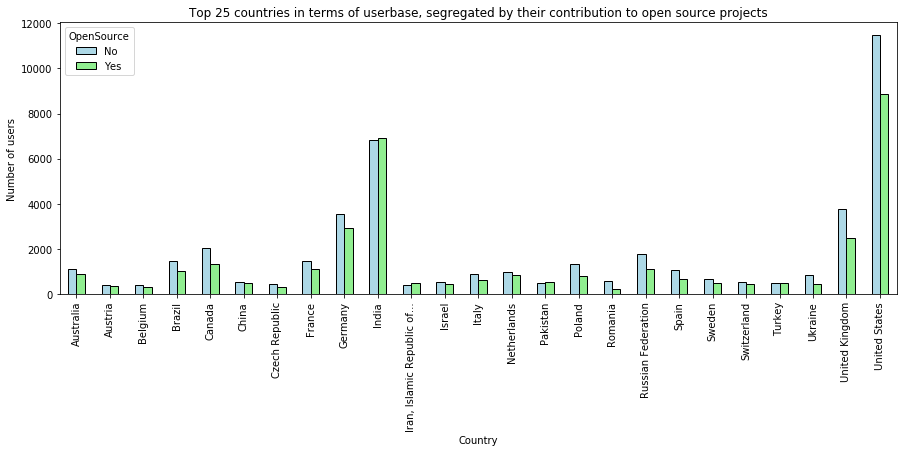

In [16]:
top25 = df.loc[df.Country.isin(df.Country.value_counts().head(25).index), :]

# df.Country.value_counts().head(25).index gives the list of top 25 countries,
#isin() checks if any of the list elements is present in the df.Country series


pd.crosstab(top25.Country, top25.OpenSource).plot(kind = 'bar', edgecolor = 'black',
                                             color = ['lightblue', 'lightgreen'], figsize = (15,5))
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.title('Top 25 countries in terms of userbase, segregated by their contribution to open source projects')
plt.show()

- The green bars indicate the population that contributes to open source projects and the blue indicates the rest
- If we want to the bars to be sorted the same way as the earlier plot, we can index the crosstabdata in that order

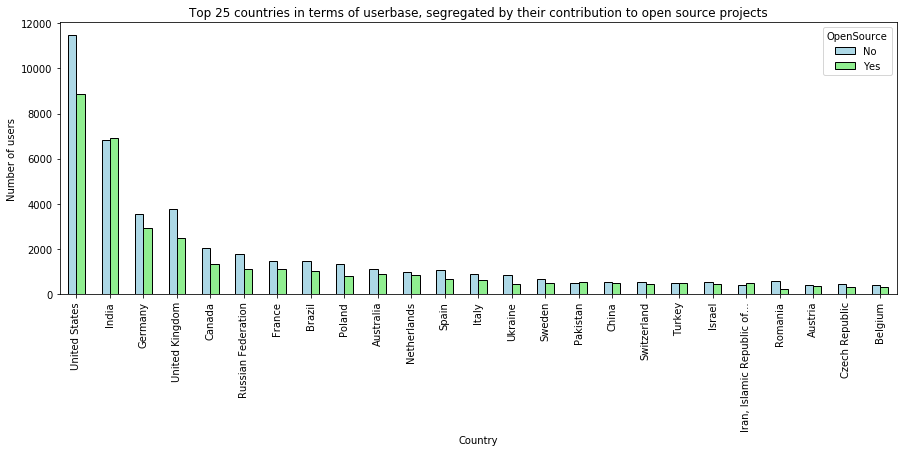

In [17]:
pd.crosstab(top25.Country, top25.OpenSource).loc[df.Country.value_counts().head(25).index,:].plot(kind = 'bar', 
                                                                                                  edgecolor = 'black',
                                                                                                  color = ['lightblue',
                                                                                                           'lightgreen'],
                                                                                                  figsize = (15,5))


plt.xlabel('Country')
plt.ylabel('Number of users')
plt.title('Top 25 countries in terms of userbase, segregated by their contribution to open source projects')
plt.show()

- Proportionally, Indian users seem to be contributing more for open source projects than most other countries
- In case of Turky, the two categories are almost the same
- In case of Iran, the open source contributors are more compared to the ones that do not contribute

**Task for student**: Write a piece of code to plot the number of users who code as a hobby vs number of users who do not, by country (consider the top 10 countries in terms of user base).  use: "Hobby" column.

_Let's explore the various job titles that users hold_

In [18]:
df.DevType.unique()

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'],
      dtype=object)

- A lot of entries have composite job titles
- We have to write some additional steps to seperate the titles

In [23]:
df.DevType.apply(lambda x: x.split(sep = ';'))

AttributeError: 'float' object has no attribute 'split'

- The reason for the above error is the presence of NaN values in the data
- We can avoid it by using **try & except** block

In [24]:
def split_title(title):
    
    try:
        return title.split(sep = ';')
    except:
        return []

In [25]:

titles = df.DevType.apply(lambda x: split_title(x))
titles.head()

0                               [Full-stack developer]
1    [Database administrator, DevOps specialist, Fu...
2          [Engineering manager, Full-stack developer]
3                               [Full-stack developer]
4    [Data or business analyst, Desktop or enterpri...
Name: DevType, dtype: object

- What we are getting in the above code is a series of lists
- The next step would be to combine these lists

In [26]:
title_list = []

for composite_title in df.DevType:
    
    title_list.extend(split_title(composite_title))

In [27]:
len(np.unique(title_list))

20

- The above list contains all the job titles of the user base
- There are 20 unique job titles in the user pool
- Beyond just the job titles we can also get the count of individual job titles and see the proportion of each job title in the user pool

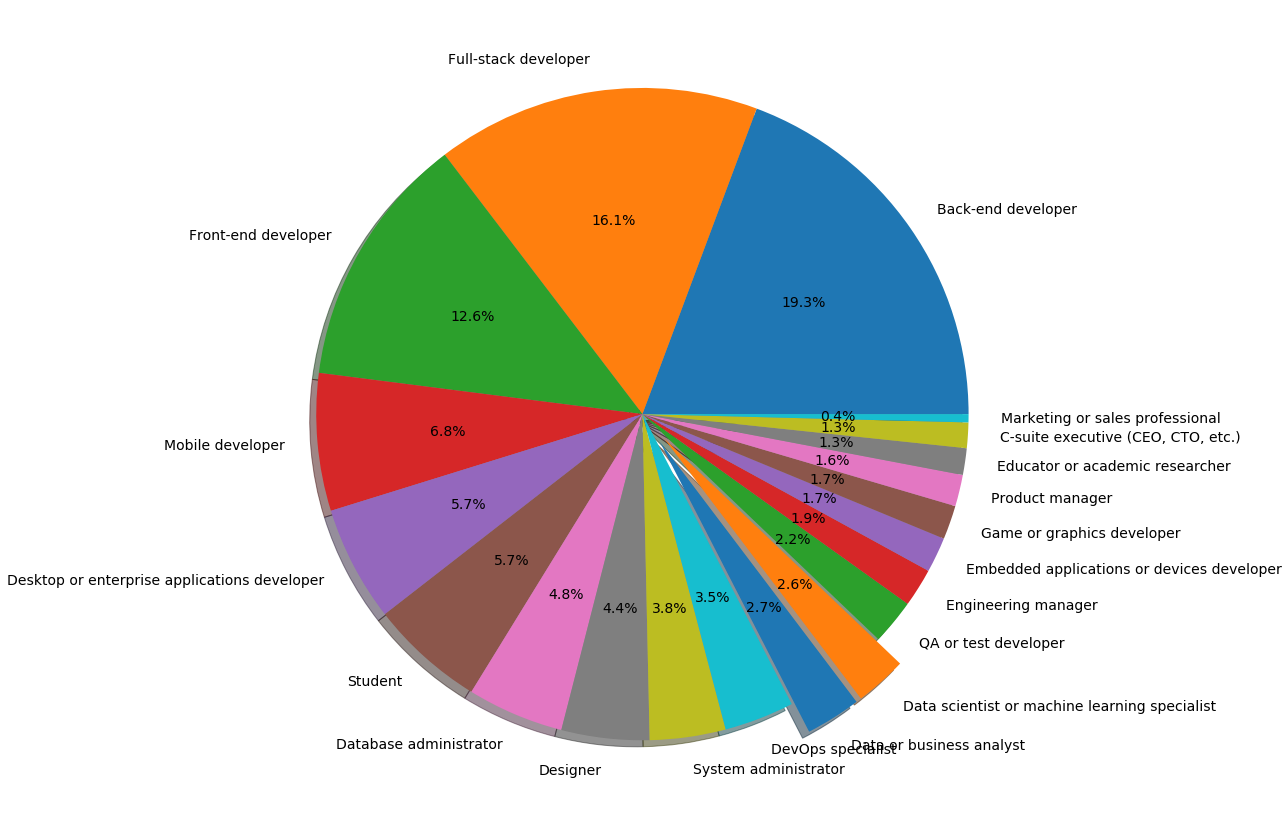

In [28]:
series = pd.Series(title_list).value_counts()
 
explode = np.zeros(len(series))

indices = series.index.isin(['Data or business analyst', 'Data scientist or machine learning specialist'])

explode[indices] = 0.1

plt.figure(figsize=(15,15))

plt.pie(series, labels = series.index, autopct='%.1f%%',shadow = True, explode = explode, textprops={'fontsize': 14})

plt.show()

- The proportion of users who are in analytics or ML field are about 5.3%
- Close to 50% of the cohort are web developers
- You can observe the proportion other jobs 

**code explanation**: We got the frequency of job titles from title_list, by converting it to series and using the pd.value_counts method. Using these frequency counts, we made a pie chart. To pop the two specific job titles, we got a boolean array of series where the value is equal to the specific job title. We used this boolean array to index an array of zeros and replace the values in the array with a non-zero number

_Let's take a subset of the data that describes only the analysts_

In [29]:
analysts = df.loc[df.DevType.isin(['Data or business analyst', 'Data scientist or machine learning specialist']), :]

In [30]:
analysts.shape

(1368, 129)

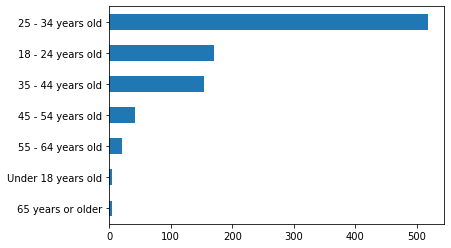

In [31]:
analysts.Age.value_counts().plot.barh().invert_yaxis()

- A significant majority of the data science professionals are of the age group 25-34

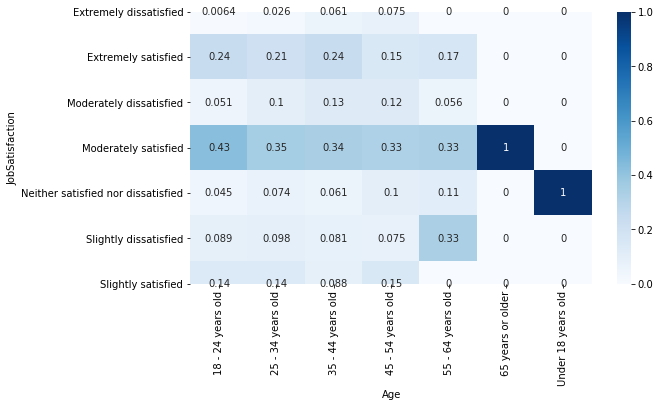

In [32]:
import seaborn as sns

plt.figure(figsize=(9,5))
sns.heatmap(pd.crosstab(analysts.JobSatisfaction, analysts.Age, normalize = 'columns'), cmap = 'Blues', annot = True)
plt.show()

- 67% of the majority age-group i.e, 18-24, are quiet satisfied with their jobs
- Age groups 45-54 and 55-64 seem to be dissatisfied with their data science jobs

In [33]:
salaries = analysts.loc[:,['Salary', 'SalaryType', 'Currency', 'ConvertedSalary']].dropna()
salaries.head()

,Salary,SalaryType,Currency,ConvertedSalary
347,113000,Yearly,U.S. dollars ($),113000.0
393,2500,Monthly,Euros (€),36720.0
576,34000,Yearly,Euros (€),41612.0
618,30000,Yearly,U.S. dollars ($),30000.0
802,300000,Yearly,U.S. dollars ($),300000.0


In [34]:
salaries.SalaryType.value_counts()

Yearly     378
Monthly    179
Weekly      18
Name: SalaryType, dtype: int64

In [35]:
salaries['monthly_salary'] = salaries.ConvertedSalary

for i in salaries.index:
    if salaries.loc[i, 'SalaryType'] == 'Yearly':
        salaries.loc[i, 'monthly_salary'] = salaries.loc[i, 'ConvertedSalary']/12
    elif salaries.loc[i, 'SalaryType'] == 'Weekly':
        salaries.loc[i, 'monthly_salary'] = salaries.loc[i, 'ConvertedSalary']*4

In [36]:
salaries.head()

,Salary,SalaryType,Currency,ConvertedSalary,monthly_salary
347,113000,Yearly,U.S. dollars ($),113000.0,9416.666667
393,2500,Monthly,Euros (€),36720.0,36720.000000
576,34000,Yearly,Euros (€),41612.0,3467.666667
618,30000,Yearly,U.S. dollars ($),30000.0,2500.000000
802,300000,Yearly,U.S. dollars ($),300000.0,25000.000000


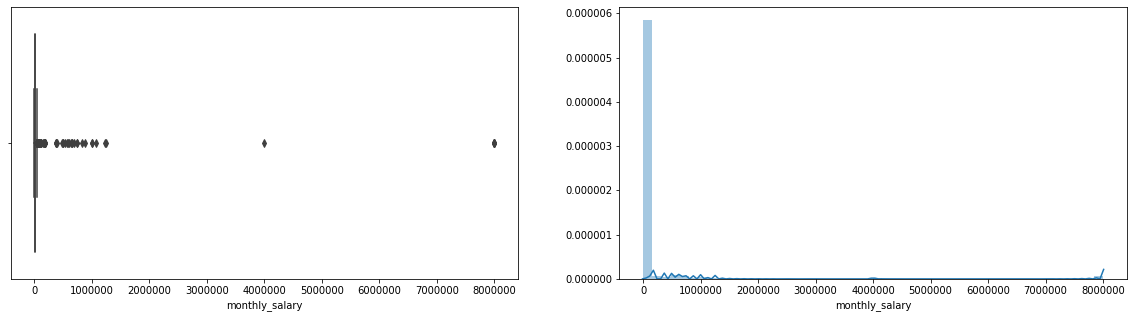

In [37]:
fig, ax = plt.subplots(1,2, sharex = True)

fig.set_figheight(5)
fig.set_figwidth(20)
sns.boxplot(salaries.monthly_salary, ax= ax[0])
sns.distplot(salaries.monthly_salary, ax = ax[1])
plt.show()

- Histogram in this case does not give much information because of the extreme skew in the distribution
- The data is highly skewed. Hence, we will look at the numbers

In [38]:
salaries.monthly_salary.describe().apply(lambda x: format(x, '.2f'))

count        575.00
mean      135512.06
std       838091.65
min            0.00
25%         4718.96
50%         7750.00
75%        19140.00
max      8000000.00
Name: monthly_salary, dtype: object

- 75% of the people have salaries less than 19140 USD and the median salary for a data scientist is 7750 USD

In [39]:
salaries['Salary'] = salaries.Salary.apply(lambda x: x.replace(',', '')).apply(float)

In [40]:
Indian_salaries = salaries.loc[salaries.Currency.apply(lambda x: 'Indian' in x), :]
Indian_salaries['monthly_salary'] = Indian_salaries.Salary

for i in Indian_salaries.index:
    if Indian_salaries.loc[i, 'SalaryType'] == 'Yearly':
        Indian_salaries.loc[i, 'monthly_salary'] = Indian_salaries.loc[i, 'Salary']/12
    elif Indian_salaries.loc[i, 'SalaryType'] == 'Weekly':
        Indian_salaries.loc[i, 'monthly_salary'] = Indian_salaries.loc[i, 'Salary']*4

Indian_salaries.sample(5)

E:\Machine learning\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Machine learning\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Salary,SalaryType,Currency,ConvertedSalary,monthly_salary
56964,540000.0,Yearly,Indian rupees (₹),8453.0,45000.000000
43023,700000.0,Yearly,Indian rupees (₹),10958.0,58333.333333
8478,950000.0,Monthly,Indian rupees (₹),178464.0,950000.000000
82963,1200000.0,Yearly,Indian rupees (₹),18785.0,100000.000000
54141,25000.0,Monthly,Indian rupees (₹),4692.0,25000.000000


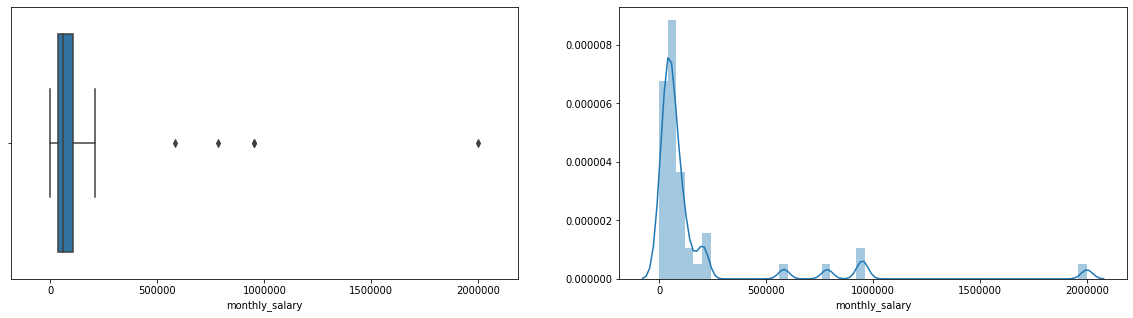

In [41]:
fig, ax = plt.subplots(1,2, sharex = True)

fig.set_figheight(5)
fig.set_figwidth(20)
sns.boxplot(Indian_salaries.monthly_salary, ax= ax[0])
sns.distplot(Indian_salaries.monthly_salary, ax = ax[1])
plt.show()

In [42]:
Indian_salaries.monthly_salary.describe().apply(lambda x: format(x, '.0f'))

count         48
mean      170981
std       347704
min            0
25%        35000
50%        58333
75%       106854
max      2000000
Name: monthly_salary, dtype: object

- From the above numbers and plots we can see that the median salary for a professional in data science or business analytics field in India is about 58k per month
- However the max value shows that it is 2Cr, which is a not a reasonable number 
- These unreasonable numbers are called outliers
- We will learn about outliers and how to deal with them in later modules

# Conclusion:
Now that we got a good idea of how to plot, manipulate, draw insights and extract relevant data from a huge dataset, and we still have a lot of unexplored columns in the dataset, from here on look at the survey_schema data and explore data that you find interesting

All the best!   